In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_excel('actas-defuncion-covid-19-cdmx.xlsx')
df.sample(5)

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
1274,55 AÑOS,2020-04-26,18,4,"INSUFICIENCIA RESPIRATORIA AGUDA SEVERA, NEUMO...",56
1970,67 AÑOS,2020-04-30,18,4,"NEUMONIA ATIPICA POR SAR-COV2, SEPSIS POR INFE...",11659
1592,40 AÑOS,2020-04-28,18,4,"ENFERMEDAD RESPIRATORIA AGUDA NCOV, DIABETES M...",5873
2734,70 AÑOS,2020-05-04,19,5,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA ATI...",7141
3727,45 AÑOS,2020-05-08,19,5,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA ATI...",7918


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   object        
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 214.8+ KB


In [0]:
df.describe()

,SEMANA,MES,ACTA
count,4579.000000,4579.000000,4579.000000
mean,18.158768,4.544224,7028.533086
std,1.238276,0.505495,3980.228596
min,12.000000,3.000000,1.000000
25%,17.000000,4.000000,5116.000000
50%,18.000000,5.000000,6942.000000
75%,19.000000,5.000000,10649.500000
max,20.000000,5.000000,13563.000000


In [0]:
df['EDAD'] = df['EDAD'].str.rstrip('DIASAÑOSMESES')
df.head()

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
0,41,2020-03-18,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
1,61,2020-03-23,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2,60,2020-03-26,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
3,37,2020-03-26,13,3,NEUMONIA POR CORONAVIRUS,7879
4,63,2020-03-26,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [0]:
df['EDAD'] = df['EDAD'].astype(int)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EDAD    4579 non-null   int64         
 1   FECHA   4579 non-null   datetime64[ns]
 2   SEMANA  4579 non-null   int64         
 3   MES     4579 non-null   int64         
 4   RAZON   4579 non-null   object        
 5   ACTA    4579 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 214.8+ KB


In [0]:
df.corr()

,EDAD,SEMANA,MES,ACTA
EDAD,1.000000,0.023771,0.028012,0.000489
SEMANA,0.023771,1.000000,0.779375,0.058207
MES,0.028012,0.779375,1.000000,0.052269
ACTA,0.000489,0.058207,0.052269,1.000000


In [0]:
df.columns

Index(['EDAD', 'FECHA', 'SEMANA', 'MES', 'RAZON', 'ACTA'], dtype='object')

In [0]:
df = df.set_index('FECHA')

In [0]:
df.head()

,EDAD,SEMANA,MES,RAZON,ACTA
FECHA,,,,,
2020-03-18,41,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
2020-03-23,61,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2020-03-26,60,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
2020-03-26,37,13,3,NEUMONIA POR CORONAVIRUS,7879
2020-03-26,63,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [0]:
df.index #fechas: from 2020-03-18 to 2020-05-12

DatetimeIndex(['2020-03-18', '2020-03-23', '2020-03-26', '2020-03-26',
               '2020-03-26', '2020-03-27', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-29',
               ...
               '2020-05-12', '2020-05-12', '2020-05-12', '2020-05-12',
               '2020-05-12', '2020-05-12', '2020-05-12', '2020-05-12',
               '2020-05-12', '2020-05-12'],
              dtype='datetime64[ns]', name='FECHA', length=4579, freq=None)

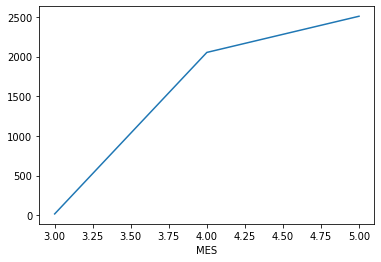

In [0]:
df.groupby(['MES']).size().plot()

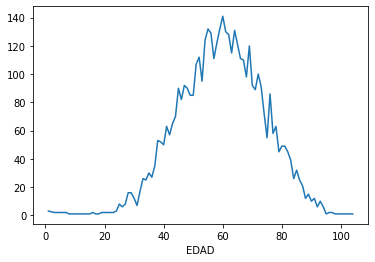

In [0]:
df.groupby(['EDAD']).size().plot()

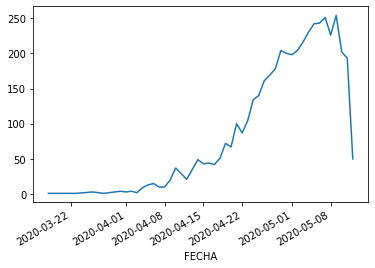

In [0]:
df.groupby(df.index).size().plot()

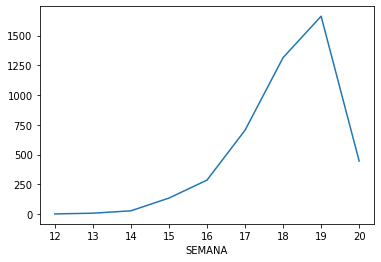

In [0]:
df.groupby(['SEMANA']).size().plot()

In [0]:
df.groupby([df.index,'RAZON']).size()

FECHA       RAZON                                                                                                                    
2020-03-18  CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS .COV-2, DIABETES MELLITUS TIPO 2, OBESIDAD.                                   1
2020-03-23  INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIRAL COVID - 19, MIELOMA MULTIPLE, DIABETES MELLITUS TIPO 2.                     1
2020-03-26  CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMOIDE DE UTERO, DIABETES MELLITUS TIPO 2                                         1
            NEUMONIA POR CORONAVIRUS                                                                                                     1
            SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA DEBIDA A OTROS VIRUS, COVID - 19, HIPÉRTENSION ARTERIAL SISTEMICA.    1
                                                                                                                                        ..
2020-05-12  NEUMONIA ATIPICA, SO

Second Data

In [0]:
df2 = pd.read_csv('200521COVID19MEXICO.csv', encoding='latin1')  #instead encoding = 'uft-8'
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1.0,97.0,99.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,99.0,MÃ©xico,99,2.0
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,1.0
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,2020-04-10,2020-04-07,9999-99-99,97,2,35,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,97.0
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,2020-04-04,2020-04-04,9999-99-99,2,2,61,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,99.0,1.0,99.0,MÃ©xico,99,2.0


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76442 entries, 0 to 76441
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_ACTUALIZACION  76442 non-null  object 
 1   ID_REGISTRO          76442 non-null  object 
 2   ORIGEN               76442 non-null  int64  
 3   SECTOR               76442 non-null  int64  
 4   ENTIDAD_UM           76442 non-null  int64  
 5   SEXO                 76442 non-null  int64  
 6   ENTIDAD_NAC          76442 non-null  int64  
 7   ENTIDAD_RES          76442 non-null  int64  
 8   MUNICIPIO_RES        76442 non-null  int64  
 9   TIPO_PACIENTE        76442 non-null  int64  
 10  FECHA_INGRESO        76442 non-null  object 
 11  FECHA_SINTOMAS       76442 non-null  object 
 12  FECHA_DEF            76442 non-null  object 
 13  INTUBADO             76442 non-null  int64  
 14  NEUMONIA             76442 non-null  int64  
 15  EDAD                 76442 non-null 

In [0]:
df2.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76442.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000
mean,1.666911,8.808613,14.735525,1.548756,16.247940,15.081146,35.738259,1.342325,64.461906,1.751040,45.187489,1.007352,54.296634,4.088199,2.394971,2.531338,2.526838,2.560314,2.344867,2.657749,2.545741,2.409532,2.545270,2.489973,43.874348,1.220745,98.696903,64.462173
std,0.471321,8.785967,8.263297,0.497620,10.795038,8.161826,49.461399,0.474491,45.115850,0.660073,16.472859,0.085429,47.267387,14.124079,7.350159,7.273885,7.332900,7.443591,7.264433,8.178370,7.404636,7.616998,7.379983,7.436909,48.321587,0.414752,5.423586,45.116402
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,6.000000,1.000000,2.000000,1.000000,33.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,2.000000
50%,2.000000,9.000000,13.000000,2.000000,15.000000,15.000000,16.000000,1.000000,97.000000,2.000000,44.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
75%,2.000000,12.000000,21.000000,2.000000,22.000000,21.000000,48.000000,2.000000,97.000000,2.000000,56.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,114.000000,2.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,99.000000,99.000000


In [0]:
from datetime import datetime

In [0]:
df2['FECHA_ACTUALIZACION'] = pd.to_datetime(df2['FECHA_ACTUALIZACION'])
df2['FECHA_INGRESO'] = pd.to_datetime(df2['FECHA_INGRESO'])
df2['FECHA_SINTOMAS'] = pd.to_datetime(df2['FECHA_SINTOMAS'])
#df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2[df2.FECHA_DEF != '9999-99-99'] #drop rows with that value

In [0]:
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1.0,97.0,99.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,99.0,MÃ©xico,99,2.0
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,1.0
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
19,2020-05-21,1df826,2,4,9,2,15,9,13,2,2020-03-21,2020-03-16,2020-03-22,2,1,78,1.0,97.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
20,2020-05-21,15cde6,2,4,25,2,25,25,6,2,2020-04-03,2020-04-03,2020-04-13,2,2,53,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0


In [0]:
df2['FECHA_DEF'] = pd.to_datetime(df2['FECHA_DEF'])

In [0]:
df2 = df2.set_index('FECHA_DEF')


In [0]:
df2.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
FECHA_DEF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-27,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2,1,71,1.0,97.0,99.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,99.0,MÃ©xico,99,2.0
2020-04-03,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2,2,66,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,1.0
2020-04-20,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2,2,67,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
2020-03-22,2020-05-21,1df826,2,4,9,2,15,9,13,2,2020-03-21,2020-03-16,2,1,78,1.0,97.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0
2020-04-13,2020-05-21,15cde6,2,4,25,2,25,25,6,2,2020-04-03,2020-04-03,2,2,53,1.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,99.0,MÃ©xico,99,2.0


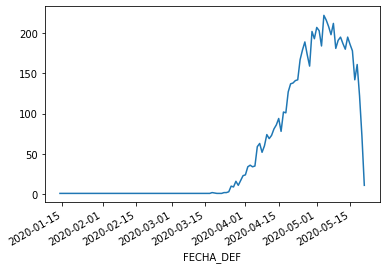

In [0]:
df2.groupby(df2.index).size().plot()

In [0]:
df2.groupby(['DIABETES']).size()

DIABETES
1.0     2634
2.0     4155
98.0      70
dtype: int64

In [0]:
df2.groupby(['EPOC']).size()

EPOC
1.0      429
2.0     6357
98.0      73
dtype: int64

In [0]:
df2.groupby(['ASMA']).size()

ASMA
1.0      167
2.0     6621
98.0      71
dtype: int64

In [0]:
df2.groupby(['CARDIOVASCULAR']).size()

CARDIOVASCULAR
1.0      414
2.0     6368
98.0      77
dtype: int64

In [0]:
df2.groupby(['RENAL_CRONICA']).size()

RENAL_CRONICA
1.0      526
2.0     6259
98.0      74
dtype: int64

In [0]:
df2.groupby(['TABAQUISMO']).size()

TABAQUISMO
1.0      680
2.0     6106
98.0      73
dtype: int64

In [0]:
df2.groupby(['RESULTADO']).size()

RESULTADO
1.0    6510
2.0     349
dtype: int64

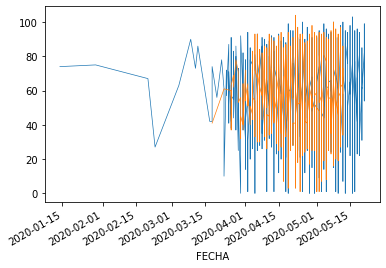

In [0]:
df2['EDAD'].plot(linewidth=0.7)
df['EDAD'].plot(linewidth=0.7)